#**AIDI 1100: INTRODUCTION TO AI DEVELOPMENT**#
##**Final Project**##
##Section 1: Group 3##

###Team Members:


Oguntolu, Felicity

Ganesan, Gayathri

Mathew, Manisha

Kanjiramkuzhakkal Subash, Pranav

Govindasamy, Rajeshkumar

Thakkar, Shukan

# Extra mile:

1. Used Candlestick chart to analyze the bullish/bearish trends.
2. Visualized weekly average closing price inorder to better understand the trend.

## 1. Scan/Parse
a. Scan (the last two weeks or the last week, upto you) and parse news from “newswire” website below.
https://www.prnewswire.com/news-releases/news-releases-list

In [ ]:
# importing request module for http request and BeautifulSoup for parsing the html content
import requests
from bs4 import BeautifulSoup

def get_and_parse_html(url):
    try:

        # Send an HTTP GET request to the specified URL and saving it in variable result
        result = requests.get(url)

        # Check if the request was successful
        if result.status_code == 200:
            print("Request was successful!")

            # Create a BeautifulSoup object to parse the HTML content
            global doc
            doc = BeautifulSoup(result.text, "html.parser")

            # Return the prettified HTML content
            return doc.prettify()

        # If there was an error, print the HTTP status code indicating the error
        else:
            print(f"Error: {result.status_code}")
            return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Initializing the url
url = "https://www.prnewswire.com/news-releases/news-releases-list/?month=11&day=02&year=2023&hour=16"
# Calling the function
html_content = get_and_parse_html(url)

Request was successful!


We have taken the stock symbols of two Companies namely, **Paramount Global(PARA)** and **PureCycle Technologies, Inc.(PCT)** for this project from www.prnewswire.com website.

1. Paramount Global (PARA) reference - https://www.prnewswire.com/news-releases/paramount-global-reports-third-quarter-earnings-results-301976217.html

2. PureCycle Technologies, Inc.(PCT) reference - https://www.prnewswire.com/news-releases/pct-investors-have-opportunity-to-lead-purecycle-technologies-inc-securities-fraud-lawsuit-301995149.html

**Code:**

If the request is successful, html of the parsed news will be returned by the function.

## 2. Track/Store/Search
a. Keep track of the news by storing the parsed news somewhere (CSV, DF, DB, EXCEL, anything else)

b. For all parsed news, search the content of the tracked news to find at least 2-3 stock symbols in a specific industry of your
choice; e.g: (TSX: TSLA); (TSX: GM)

In [ ]:
import csv
# store the parsed news in a csv file
with open('newswire.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerows(doc)

The parsed news is stored in the 'newswire.csv' file.

In [ ]:
stock =['PCT', 'PARA'] #list of stock symbols you which to search the parsed news for
for i in stock:
  with open("newswire.csv") as f_obj:
      reader = csv.reader(f_obj, delimiter=' ')
      for line in reader:      #Iterates through the rows of your csv
          if i in str(line):   #check if the string you want to search is in the row
              print(i)

PCT
PARA


The selected stock is searched in the csv file and it returns the stock symbols if its present in the newswire.csv file.

## 3. Retrieve Data (Web (API))
a. Scan Yahoo! Finance page for the stock symbols that appeared in the news (there should be a module for yahoo finance that
you can use instead of looking for webpage content).

b. Capture/retrieve the stock price and volume for last 30 days.

In [ ]:
# Installing the yahoo finance module
!pip install yfinance

In [ ]:
# Importing the yahoo finance
import yfinance as yf

# Initializing variables para and pct as None
para = None
pct = None

#Defining function get_data to fetch and download the stock data for PARA and PCT
def get_data(ticks):
    # Global variables - 'para' and 'pct'
    global para, pct

    # passing the stock symbols seperated by a space
    for tick in ticks:

        #Downloading the last 30 days stock data and storing it in 'ticker' variable
        ticker = yf.download(tick, period="30d")

        #Assigning the tickers to para and pct variables
        if tick == "PARA":
            para = ticker
        else:
            pct = ticker

#Inputting the tickers
tickers_input = input("Enter tickers separated by space: ")
tickers_list = tickers_input.split()

#Function call
get_data(tickers_list)
print(para.head())
print(pct.head())

Enter tickers separated by space: PARA PCT
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2023-10-27  10.90  11.00  10.64  10.70      10.70  11126900
2023-10-30  10.76  11.11  10.74  11.00      11.00  13337400
2023-10-31  11.06  11.13  10.82  10.88      10.88  15194100
2023-11-01  10.72  10.81  10.51  10.80      10.80  16678200
2023-11-02  11.07  11.94  11.04  11.92      11.92  23944800
            Open   High   Low  Close  Adj Close   Volume
Date                                                    
2023-10-27  4.75  4.949  4.65   4.80       4.80  1789800
2023-10-30  4.87  5.020  4.70   4.71       4.71  1396300
2023-10-31  4.71  4.780  4.43   4.45       4.45  1489200
2023-11-01  4.46  4.520  4.13   4.18       4.18  3880300
2023-11-02  4.26  4.500  4.08   4.33       4.33  3520700


The selected stock symbols are inputted and using yahoofinace module, the respective stock data is collected and stored in their respective dataframes.

In [ ]:
# CHECKING FOR NULL
print(para.isna().sum())
print(pct.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Creating a series with Closing values and Volume of PARA and PCT with date as index
para_close = para['Close']
pct_close = pct['Close']
para_vol = para['Volume']
pct_vol = pct["Volume"]

## 4.  Visualize
a. Prepare colourful visualization/graphs showing stock prices for last 30 days.

  i. Visualization should be a plot (time - series) for:
1. Volume
2. Daily Close Price


### Paramount Global

#### **1. Volume**

Visualizing the volume data using Matplotlib and Plotly

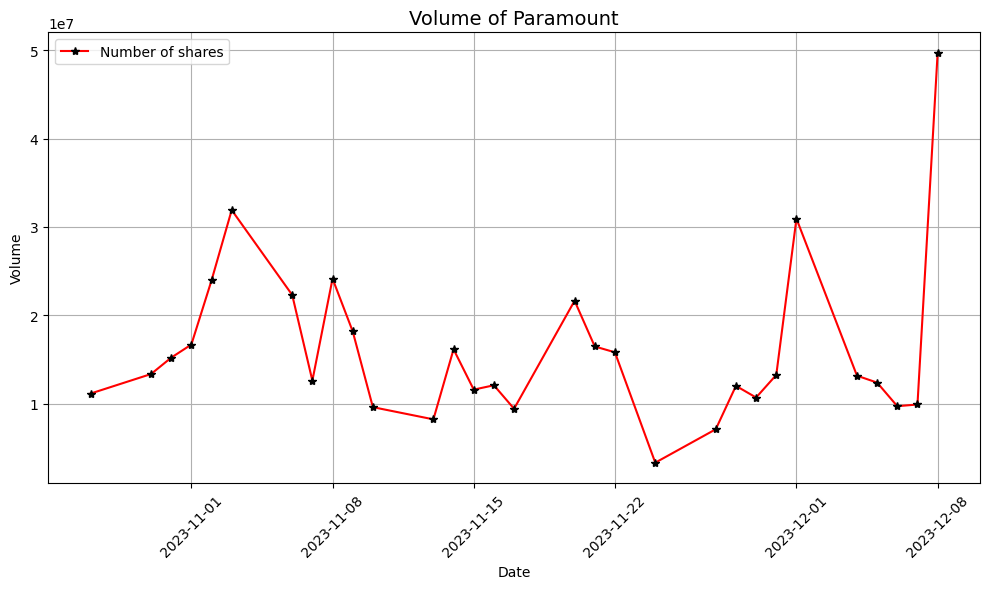

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
plt.plot(para_vol, label = "Number of shares", marker = '*', color ='red', mfc = 'black', mec = 'black')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Volume of Paramount", fontsize = 14)
plt.grid()
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [ ]:
# Using plotly.express
import plotly.express as px

df = para
fig = px.line(df, x=para.index, y="Volume")
fig.update_traces(line_color='blue',mode='markers+lines')
fig.show()

### Inference:

From 10 Million shares in the end of October, the shares jumped to 50 Million on 8th of December. Although the growth seems to be exponential, the shares dropped down to 3.2M on Nov. 24th.   

### **2. Daily Close Price**


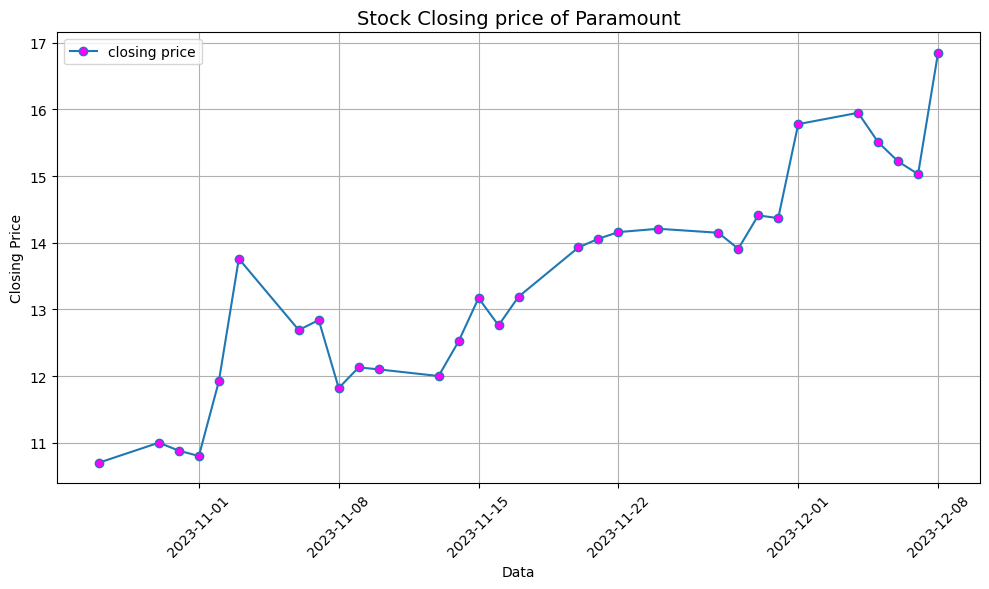

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
plt.plot(para_close, label = "closing price", marker='o', mfc = 'magenta')
plt.xlabel("Data")
plt.ylabel("Closing Price")
plt.title("Stock Closing price of Paramount", fontsize = 14)
plt.grid()
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()


plt.show()

### PCT

#### **1. Volume**

Visualizing the volume data using Matplotlib and Plotly

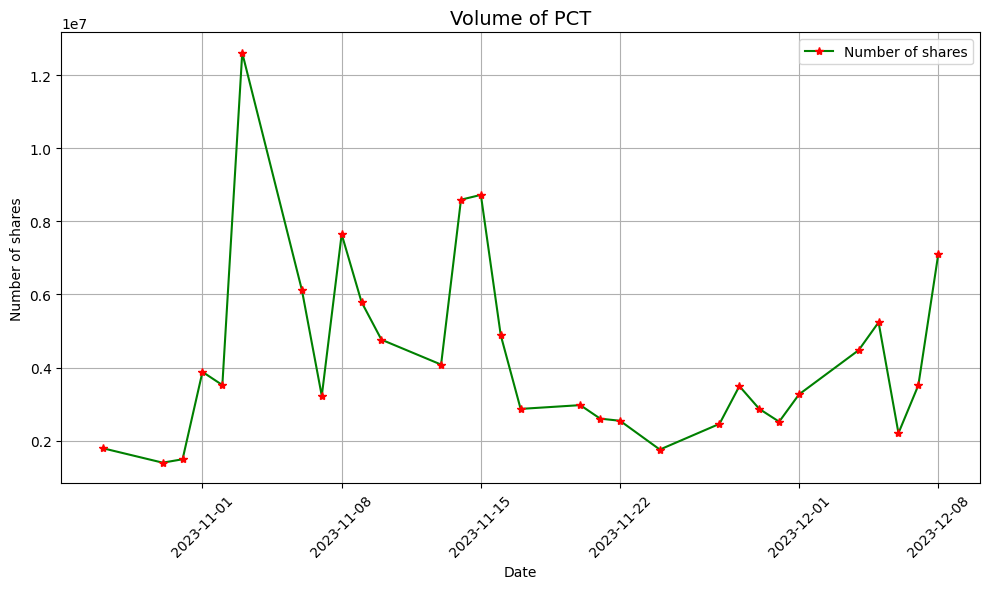

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
plt.plot(pct_vol, label = "Number of shares", marker = '*', color ='green', mfc = 'red', mec = 'red')
plt.xlabel("Date")
plt.ylabel("Number of shares")
plt.title("Volume of PCT", fontsize = 14)
plt.grid()
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [ ]:
# Using plotly.express
import plotly.express as px

df = pct
fig = px.line(df, x=pct.index, y="Volume")
fig.update_traces(line_color='green',mode='markers+lines')
fig.show()

###Inference:

It started with 3.8M on Nov.1, suddenly it rose to 12.6M on Nov 3rd, but then it dropped again. By looking at the graph the volume of shares started increasing from start Dec 1st.

### **2. Daily Close Price**

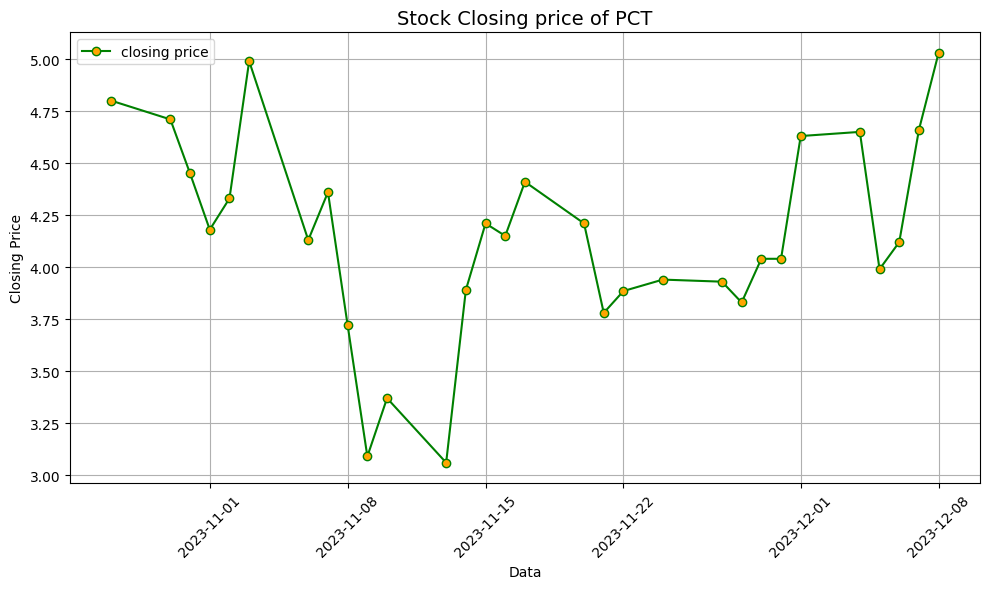

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
ax = plt.plot(pct_close, label = "closing price", color='green', marker='o', mfc = 'orange')
plt.xlabel("Data")
plt.ylabel("Closing Price")
plt.title("Stock Closing price of PCT", fontsize = 14)
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

### Additional visuals:

Closing Price comparison of Paramount Global and PCT

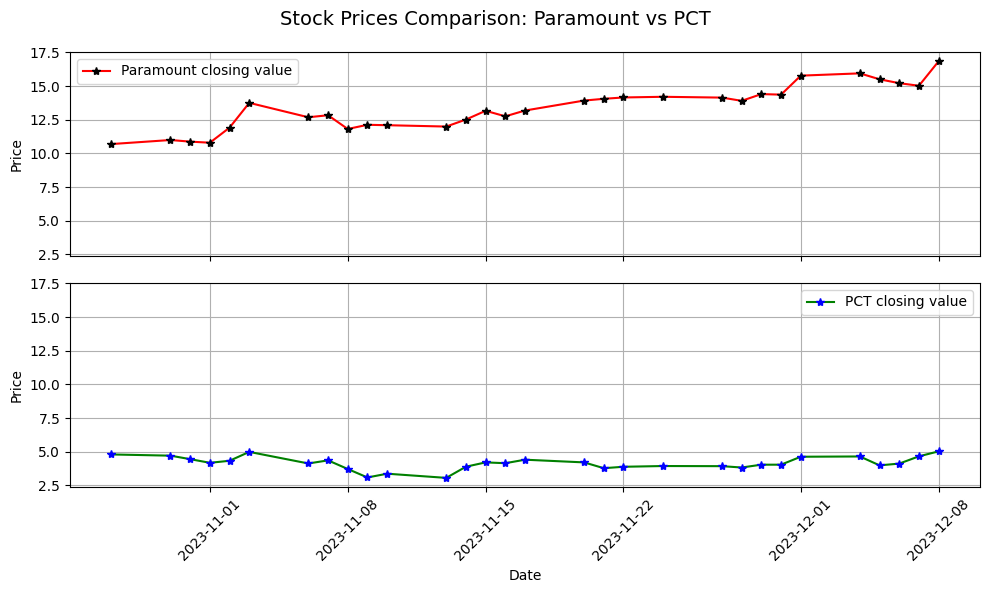

In [ ]:
%matplotlib inline
#plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, sharey=True)

# Plotting the stock prices for Paramount
axes[0].plot(para_close, label="Paramount closing value", marker='*', color='red', mfc='black', mec='black')
axes[0].set_ylabel("Price")
axes[0].grid()
axes[0].legend()

# Plotting the stock prices for PCT
axes[1].plot(pct_close, label="PCT closing value", marker = '*', color ='green', mfc = 'blue', mec = 'blue')
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
axes[1].grid()
axes[1].legend()

# Set the overall title
plt.suptitle("Stock Prices Comparison: Paramount vs PCT", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
df_para = para_close.to_frame()
df_pct = pct_close.to_frame()
df_new = df_para.merge(df_pct, left_on='Date', right_on='Date')
df_new.reset_index(inplace = True)
df_new.rename(columns={"Close_x": "PARA", "Close_y": "PCT"}, inplace =True)
#print(df_new)

In [ ]:
import plotly.express as px

df = df_new
fig = px.line(df, x='Date', y=df.columns, title='Time Series Analysis for Paramount and PCT (Closing price)')

#Adding a rangeslider
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Closing price comparison of Paramount and PCT

In [ ]:
df_new1 = df_new.set_index(['Date'])
#df_new.reset_index(inplace = True)
print(df_new1)

            Close_x  Close_y
Date                        
2023-10-27    10.70    4.800
2023-10-30    11.00    4.710
2023-10-31    10.88    4.450
2023-11-01    10.80    4.180
2023-11-02    11.92    4.330
2023-11-03    13.76    4.990
2023-11-06    12.69    4.130
2023-11-07    12.84    4.360
2023-11-08    11.82    3.720
2023-11-09    12.13    3.090
2023-11-10    12.10    3.370
2023-11-13    12.00    3.060
2023-11-14    12.52    3.890
2023-11-15    13.17    4.210
2023-11-16    12.76    4.150
2023-11-17    13.19    4.410
2023-11-20    13.93    4.210
2023-11-21    14.06    3.780
2023-11-22    14.16    3.885
2023-11-24    14.21    3.940
2023-11-27    14.15    3.930
2023-11-28    13.91    3.830
2023-11-29    14.41    4.040
2023-11-30    14.37    4.040
2023-12-01    15.78    4.630
2023-12-04    15.95    4.650
2023-12-05    15.51    3.990
2023-12-06    15.22    4.120
2023-12-07    15.03    4.660
2023-12-08    16.85    5.030


In [ ]:
df_new1.columns.names = ['company']
df_new1

company,Close_x,Close_y
Date,,
2023-10-27,10.70,4.800
2023-10-30,11.00,4.710
2023-10-31,10.88,4.450
2023-11-01,10.80,4.180
2023-11-02,11.92,4.330
2023-11-03,13.76,4.990
2023-11-06,12.69,4.130
2023-11-07,12.84,4.360
2023-11-08,11.82,3.720


In [ ]:
import plotly.express as px

df = df_new1
fig = px.area(df, facet_col="company", facet_col_wrap = 2)
fig.update_layout(height=300, width=1000)
fig.show()

Closing Price comparison of Paramount Global and PCT, The vale of paramount grew from 10.6 to 16.85 and the rise is quite steady. On the other hand, the value of PCT started from 4.8 but it was hovering around 3 to 5 for the last 2 months. So there isnt any significant growth interms of closing price.

**Recommendation:**

Definitely Recommend Paramount over PCT.

From the above graph, we can easily conclude that, Paramount global is more popular and better compared to PCT.

### Candlestick chart for Paramount stocks

In [ ]:
import yfinance as yf
import plotly.graph_objects as go



# Create a candlestick chart using Plotly Graph Objects
fig = go.Figure(data=[go.Candlestick(x=para.index,
                                     open=para['Open'],
                                     high=para['High'],
                                     low=para['Low'],
                                     close=para['Close'])])

fig.update_layout(title="Paramount Stock Price",
                  xaxis_title='Date',
                  yaxis_title='Stock Price', height=600, width=1200)
#fig.update_layout(height=300, width=1000)

# Show the plot
fig.show()

###Inference:

This chart has bullish pattermn. The trend is going upwards when we compare the values for last 30 days.

### Candlestick chart for PCT stocks

In [ ]:
import yfinance as yf
import plotly.graph_objects as go


# Create a candlestick chart using Plotly Graph Objects
fig = go.Figure(data=[go.Candlestick(x=pct.index,
                                     open=pct['Open'],
                                     high=pct['High'],
                                     low=pct['Low'],
                                     close=pct['Close'])])

fig.update_layout(title="PCT Stock Price",
                  xaxis_title='Date',
                  yaxis_title='Stock Price', height=600, width=1200, yaxis_range=[3,8])
#fig.update_layout(height=300, width=1000)

# Show the plot
fig.show()

###Inference:

Although there are many green sticks, this stock exhibits sudden drop and gradual increase. And there is no significant rise in the last 30 days.

In [ ]:
para_week = para.resample('W').mean()
print(para_week)

## 5. Extra Mile & Optional Code

a. Have you done anything else? Call it out either in the code or the header or in the presentation; GitHub? What else?


b. Recommend if ONE of the stocks is worth purchasing or not

### Weekly average Closing stock value of Paramount global and PCT

In [ ]:
import plotly.express as px

df = para_week
fig = px.line(df, x=df.index, y=df['Close'], title='Weekly average of Paramount Global Stock closing value')

#Adding a rangeslider
fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(line_color='green',mode='markers+lines')

# Add annotations for all markers
for index, row in df.iterrows():
    fig.add_annotation(
        x=index,
        y=row['Close'],
        text=f"Close: {row['Close']:.2f}",  # Customize the text as needed
        showarrow=True,
        arrowhead=4,
        ax=-50,
        ay=-50
    )

fig.show()

### Inference:

Since there is a steady increase in the average of closing price of Paramount stocks, strongly recommend buying paramount stocks. BUY STOCK, the trend is moving upwards.

### PCT Stocks weekly Average

In [ ]:
pct_week = pct.resample('W').mean()
print(pct_week)

In [ ]:
import plotly.express as px

df = pct_week
fig = px.line(df, x=df.index, y=df['Close'], title='Weekly average of PureCycle Technologies, Inc. Stock closing value')

# Find the index of the row with the maximum closing price
max_price_index = df['Close'].idxmax()

#Adding a rangeslider
fig.update_xaxes(rangeslider_visible=True)
fig.update_traces(line_color='purple', mode='markers+lines')

# Add annotation for the highest closing price
fig.add_annotation(
    x=max_price_index,
    y=df.loc[max_price_index, 'Close'],
    text=f"Highest Close: {df.loc[max_price_index, 'Close']:.2f}",
    showarrow=True,
    arrowhead=4,
    ax=-50,
    ay=-50
)
fig.show()